We will now use the data from the Chemical Solubility Notebook to explore the data analysis using RDKit using molecular descriptors. 

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('../Notebooks/bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive


Lipinski Descriptors.

A scientist at Pfizer called Christopher Lipinski came up with a heuristic rule of thumb for evaluating the druglikeness of compounds. The four parameters used to determine these rules were Absorption, Distrubition, Metabolism and excretion (ADME). Lipinski's rule states that in general an orally active drug has no more than one violation of the following criteria:

Lipinski's rules (Rule of five)
- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [2]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [3]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.empty((0,4))
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [4]:

df_lipinski = lipinski(df.canonical_smiles)
df_lipinski     

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
6637,301.298,2.0110,4.0,6.0
6638,105.093,-1.6094,3.0,3.0
6639,401.474,2.9571,3.0,5.0
6640,387.447,2.6149,4.0,5.0


We are now going to combine df & df_lipinski for analysis

In [5]:
df_combined = pd.concat([df,df_lipinski], axis = 1)
df_combined


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive,301.298,2.0110,4.0,6.0
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive,105.093,-1.6094,3.0,3.0
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate,401.474,2.9571,3.0,5.0
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive,387.447,2.6149,4.0,5.0


We will now convert IC50 to negative logarithmic scale (-log10(IC50))

Lets have a look at this data visualised to see why it is beneficial to do this!

In [6]:
def log_standard_value(input_df):
    input_df = input_df[input_df['standard_value'] > 0].copy()
    input_df['log_standard_value'] = -np.log10(input_df['standard_value'] * 1e-9)
    return input_df

In [11]:
df_combined=log_standard_value(df_combined)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,log_standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive,301.298,2.0110,4.0,6.0,4.337242
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive,105.093,-1.6094,3.0,3.0,4.416688
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate,401.474,2.9571,3.0,5.0,5.767004
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive,387.447,2.6149,4.0,5.0,5.000000


In [12]:
df_combined.standard_value.describe()

count    6.641000e+03
mean     1.026990e+05
std      8.885257e+05
min      5.000000e-06
25%      1.600000e+02
50%      2.600000e+03
75%      1.714000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [13]:
df_combined.log_standard_value.describe()

count    6641.000000
mean        5.801767
std         1.558782
min         1.304518
25%         4.765989
50%         5.585027
75%         6.795880
max        14.301030
Name: log_standard_value, dtype: float64

count    6.641000e+03
mean     1.026990e+05
std      8.885257e+05
min      5.000000e-06
25%      1.600000e+02
50%      2.600000e+03
75%      1.714000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

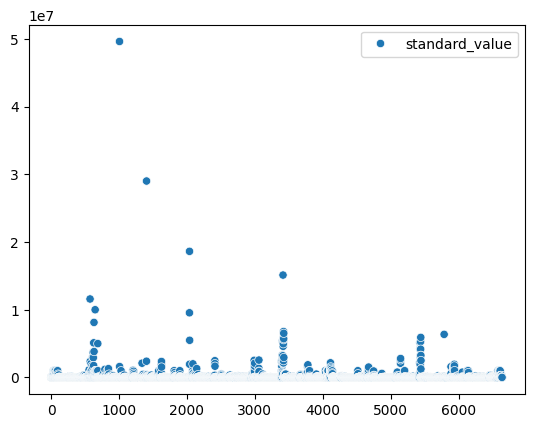

In [14]:
sns.scatterplot(data=df_combined[['standard_value']])
df_combined.standard_value.describe()

count    6641.000000
mean        5.801767
std         1.558782
min         1.304518
25%         4.765989
50%         5.585027
75%         6.795880
max        14.301030
Name: log_standard_value, dtype: float64

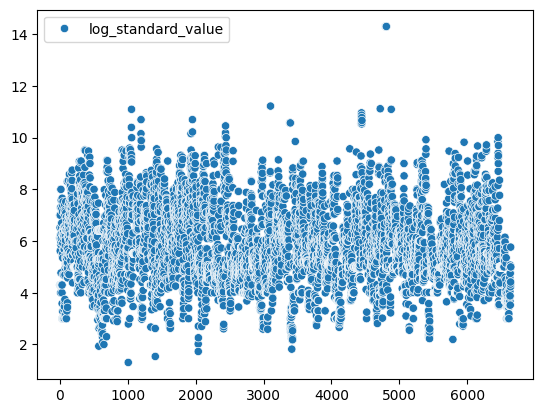

In [15]:
sns.scatterplot(data=df_combined[['log_standard_value']])
df_combined.log_standard_value.describe()

If any data points of standard_values was above 1x10^6, then we would need to alter these values as it would return a negative value for log_standard_value, however in this case this is not a problem. 

To simplify our data analysis, we will now remove the intermediate class and instead focus on active vs inactive compounds.

NOTE: ~ negates the condition are returns the opposite, try removing it to see what happens...

In [16]:
df_combined_final = df_combined[~df_combined['bioactivity_class'].isin(['intermediate'])]
df_combined_final

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,log_standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
6636,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,58370.0,inactive,243.262,1.8587,2.0,4.0,4.233810
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive,301.298,2.0110,4.0,6.0,4.337242
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive,105.093,-1.6094,3.0,3.0,4.416688
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive,387.447,2.6149,4.0,5.0,5.000000


In [17]:
df_combined_final.to_csv('bioactivity_cleaned_data.csv')
import matplotlib.pyplot as plt

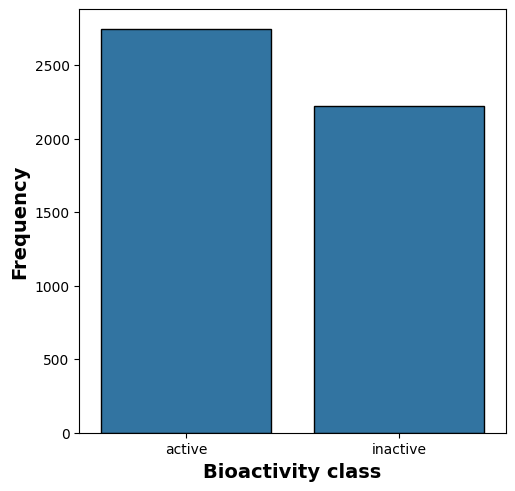

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_combined_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

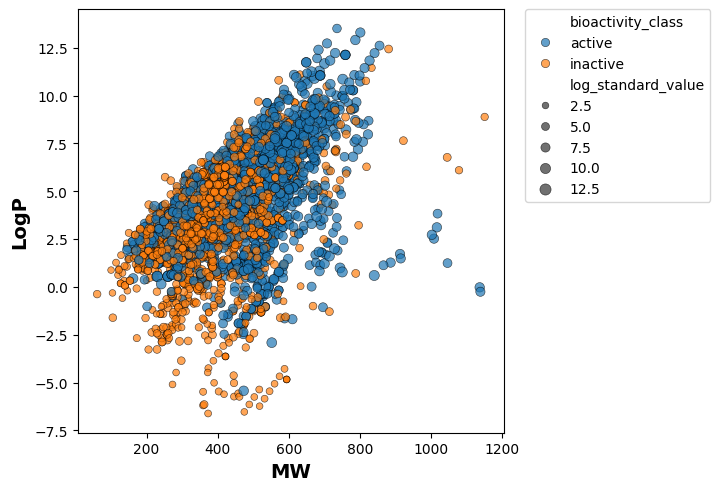

In [19]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined_final, hue='bioactivity_class', size='log_standard_value', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

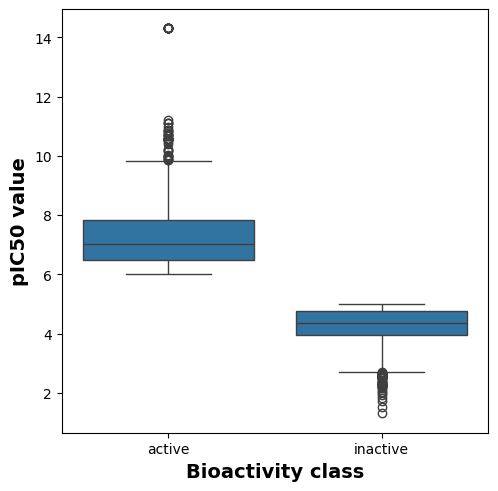

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'log_standard_value', data = df_combined_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Mann-Whitney U test



In [21]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_combined_final[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_combined_final[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     

In [22]:
mannwhitney('log_standard_value')

,Descriptor,Statistics,p,alpha,Interpretation
0,log_standard_value,6103175.0,0.0,0.05,Different distribution (reject H0)


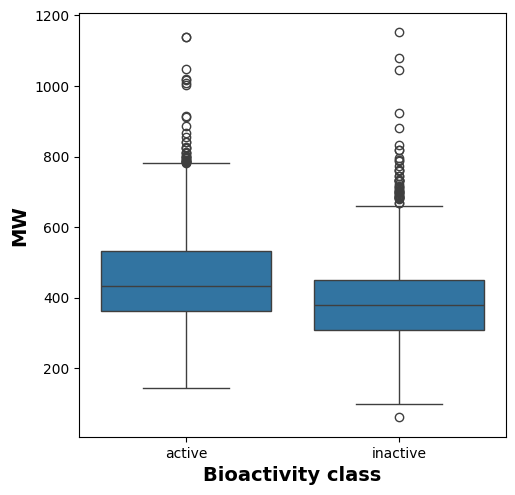

In [23]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_combined_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [24]:

mannwhitney('MW')
     

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3945723.5,9.051244e-71,0.05,Different distribution (reject H0)


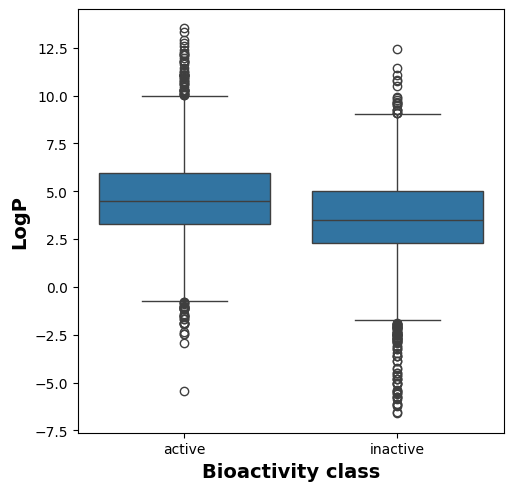

In [25]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_combined_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [26]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3882110.0,2.602070e-61,0.05,Different distribution (reject H0)


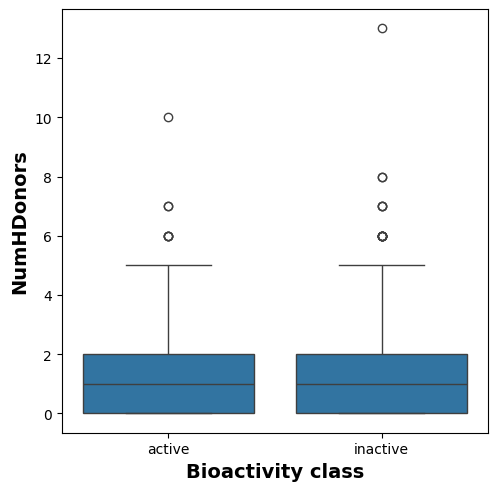

In [27]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_combined_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [28]:

mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3461921.0,1.100628e-17,0.05,Different distribution (reject H0)


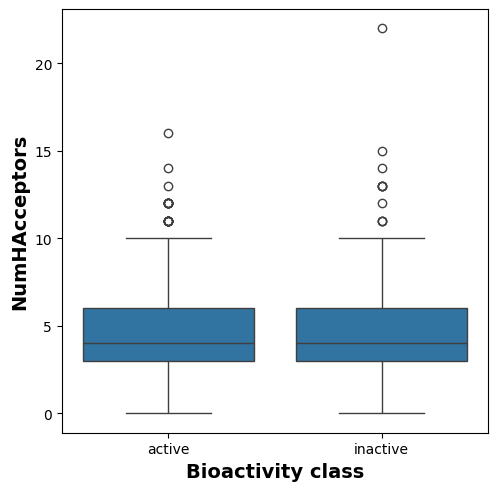

In [29]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_combined_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [30]:

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3294018.5,9.862157e-07,0.05,Different distribution (reject H0)


Summary of results

Box Plots
Actives and inactives displayed statistically significant difference which is to be expected since the thresholds were set at values where we eliminated intermediates.

Lipinski descriptors
Of the 4 lipinski's descriptors (MW, LogP, NumHDonor or Acceptors), they all had statistically different distrubution.

Now lets calcualte the descriptors.

In [31]:
df_combined_final

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,log_standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
6636,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,58370.0,inactive,243.262,1.8587,2.0,4.0,4.233810
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive,301.298,2.0110,4.0,6.0,4.337242
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive,105.093,-1.6094,3.0,3.0,4.416688
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive,387.447,2.6149,4.0,5.0,5.000000


In [32]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df_selection = df_combined_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [33]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [34]:
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    all_desc = {name: func(mol) for name, func in Descriptors.descList}
    return all_desc 


In [35]:
df_descriptors = df_selection["canonical_smiles"].apply(compute_descriptors).apply(pd.Series)
df_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.818917,11.818917,0.048049,-0.603093,0.699960,10.478261,312.325,296.197,312.111007,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.931567,12.931567,0.050268,-0.050268,0.734047,17.720000,376.913,355.745,376.112460,132.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.859892,12.859892,0.135327,-4.406486,0.527034,11.464286,426.851,412.739,426.052894,146.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.714518,12.714518,0.066807,-4.365026,0.695219,15.307692,404.845,388.717,404.068544,140.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.136256,12.136256,0.238990,-4.744549,0.799502,11.391304,346.334,333.230,346.071131,124.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,10.932106,10.932106,0.087091,-0.093179,0.593286,13.555556,243.262,230.158,243.089543,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6637,12.765227,12.765227,0.074861,-0.359537,0.601403,13.409091,301.298,286.178,301.095023,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6638,9.645324,9.645324,0.504630,-1.178241,0.394240,13.428571,105.093,98.037,105.042593,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6640,12.582373,12.582373,0.183642,-0.183642,0.431181,14.275862,387.447,366.279,387.180758,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_descriptors.to_csv("RDkit_descriptors_csv")

In [39]:
df_combined_final.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,log_standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0,6.096910


In [40]:
df_y = df_combined_final['log_standard_value']
df_y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6636    4.233810
6637    4.337242
6638    4.416688
6640    5.000000
6641    5.000000
Name: log_standard_value, Length: 4968, dtype: float64

In [41]:
FINAL_ANALYSIS_DATASET_XY = pd.concat([df_descriptors, df_y], axis=1)
FINAL_ANALYSIS_DATASET_XY.to_csv("FINAL_DATASET_XY_CSV")
FINAL_ANALYSIS_DATASET_XY

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,log_standard_value
0,11.818917,11.818917,0.048049,-0.603093,0.699960,10.478261,312.325,296.197,312.111007,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,12.931567,12.931567,0.050268,-0.050268,0.734047,17.720000,376.913,355.745,376.112460,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,12.859892,12.859892,0.135327,-4.406486,0.527034,11.464286,426.851,412.739,426.052894,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,12.714518,12.714518,0.066807,-4.365026,0.695219,15.307692,404.845,388.717,404.068544,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,12.136256,12.136256,0.238990,-4.744549,0.799502,11.391304,346.334,333.230,346.071131,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,10.932106,10.932106,0.087091,-0.093179,0.593286,13.555556,243.262,230.158,243.089543,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.233810
6637,12.765227,12.765227,0.074861,-0.359537,0.601403,13.409091,301.298,286.178,301.095023,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.337242
6638,9.645324,9.645324,0.504630,-1.178241,0.394240,13.428571,105.093,98.037,105.042593,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.416688
6640,12.582373,12.582373,0.183642,-0.183642,0.431181,14.275862,387.447,366.279,387.180758,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
